<a href="https://colab.research.google.com/github/ggpal71/Unemployment-Exploration/blob/main/U_S_Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this project we will be looking at unemployment data regarding the 50 United States by answering questions and making predictions. We will first be looking at trends in unemployment and labor participation rates with visualizations.**

In [60]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.formula.api import ols, logit
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm
from numpy.random import seed, choice
from statsmodels.api import qqplot
from scipy.stats import iqr
from scipy.stats import norm

In [61]:
#load/view data
df = pd.read_csv('Unemployment in America Per US State.csv')
display(df.head())
print("**************************")
print(df.shape)

FIPS Code  State/Area  Year  Month  \
0          1     Alabama  1976      1   
1          2      Alaska  1976      1   
2          4     Arizona  1976      1   
3          5    Arkansas  1976      1   
4          6  California  1976      1   

  Total Civilian Non-Institutional Population in State/Area  \
0                                       2,605,000             
1                                         232,000             
2                                       1,621,000             
3                                       1,536,000             
4                                      15,621,000             

  Total Civilian Labor Force in State/Area  \
0                             1,484,555      
1                               160,183      
2                               964,120      
3                               889,044      
4                             9,774,280      

   Percent (%) of State/Area's Population Total Employment in State/Area  \
0                                    57.0                   1,386,023      
1                                    69.0                     148,820      
2                                    59.5                     865,871      
3                                    57.9                     824,395      
4                                    62.6                   8,875,685      

   Percent (%) of Labor Force Employed in State/Area  \
0                                               53.2   
1                                               64.1   
2                                               53.4   
3                                               53.7   
4                                               56.8   

  Total Unemployment in State/Area  \
0                        98,532      
1                        11,363      
2                        98,249      
3                        64,649      
4                       898,595      

   Percent (%) of Labor Force Unemployed in State/Area  
0                                                6.6    
1                                                7.1    
2                                               10.2    
3                                                7.3    
4                                                9.2

**************************
(29892, 11)


In [62]:
#chcek states
states = df['State/Area'].unique()
print(states)
print('****************')
print("Lenght of states list: " + str(len(states)))

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Los Angeles County'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'New York city'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
****************
Lenght of states list: 53


**As we can see there are 53 values in the states list where there should only be 50, this means we must remove the 3 non-states from the data frame('District of Columbia', 'Los Angeles County', 'New York city')**

In [63]:
states_to_drop = ['District of Columbia', 'Los Angeles County', 'New York city']
for lab, row in df.iterrows():
    if row['State/Area'] in states_to_drop:
        df.drop(lab, inplace=True)

display(df.head(3))
print("********************************************************************************************************************************************")
print(df.shape)

FIPS Code State/Area  Year  Month  \
0          1    Alabama  1976      1   
1          2     Alaska  1976      1   
2          4    Arizona  1976      1   

  Total Civilian Non-Institutional Population in State/Area  \
0                                       2,605,000             
1                                         232,000             
2                                       1,621,000             

  Total Civilian Labor Force in State/Area  \
0                             1,484,555      
1                               160,183      
2                               964,120      

   Percent (%) of State/Area's Population Total Employment in State/Area  \
0                                    57.0                   1,386,023      
1                                    69.0                     148,820      
2                                    59.5                     865,871      

   Percent (%) of Labor Force Employed in State/Area  \
0                                               53.2   
1                                               64.1   
2                                               53.4   

  Total Unemployment in State/Area  \
0                        98,532      
1                        11,363      
2                        98,249      

   Percent (%) of Labor Force Unemployed in State/Area  
0                                                6.6    
1                                                7.1    
2                                               10.2

********************************************************************************************************************************************
(28200, 11)


**Now we must change the columns with commas/that are strings**

In [64]:
cols_to_convert = [
    'Total Civilian Non-Institutional Population in State/Area', 'Total Civilian Labor Force in State/Area',
    'Total Employment in State/Area', 'Total Unemployment in State/Area'
]

for col in cols_to_convert:
  df[col] = df[col].apply(lambda x: int(x.replace(',', '')))

display(df.head(2))

FIPS Code State/Area  Year  Month  \
0          1    Alabama  1976      1   
1          2     Alaska  1976      1   

   Total Civilian Non-Institutional Population in State/Area  \
0                                            2605000           
1                                             232000           

   Total Civilian Labor Force in State/Area  \
0                                   1484555   
1                                    160183   

   Percent (%) of State/Area's Population  Total Employment in State/Area  \
0                                    57.0                         1386023   
1                                    69.0                          148820   

   Percent (%) of Labor Force Employed in State/Area  \
0                                               53.2   
1                                               64.1   

   Total Unemployment in State/Area  \
0                             98532   
1                             11363   

   Percent (%) of Labor Force Unemployed in State/Area  
0                                                6.6    
1                                                7.1

**Lets first see which states have the highest median(due to recssions and other skewed data such as data from Covid pandemic) unemployment rates, and then see the states with highest labor-force-participation rates.**







In [65]:
median_unemp_data = df.groupby(['State/Area'], as_index=False)\
 [['Percent (%) of Labor Force Unemployed in State/Area', 'Total Unemployment in State/Area']].median()
display(median_unemp_data.head())

State/Area  Percent (%) of Labor Force Unemployed in State/Area  \
0     Alabama                                                6.5     
1      Alaska                                                7.3     
2     Arizona                                                5.8     
3    Arkansas                                                6.0     
4  California                                                6.9     

   Total Unemployment in State/Area  
0                          126494.5  
1                           22842.0  
2                          128030.0  
3                           71459.5  
4                         1000704.0

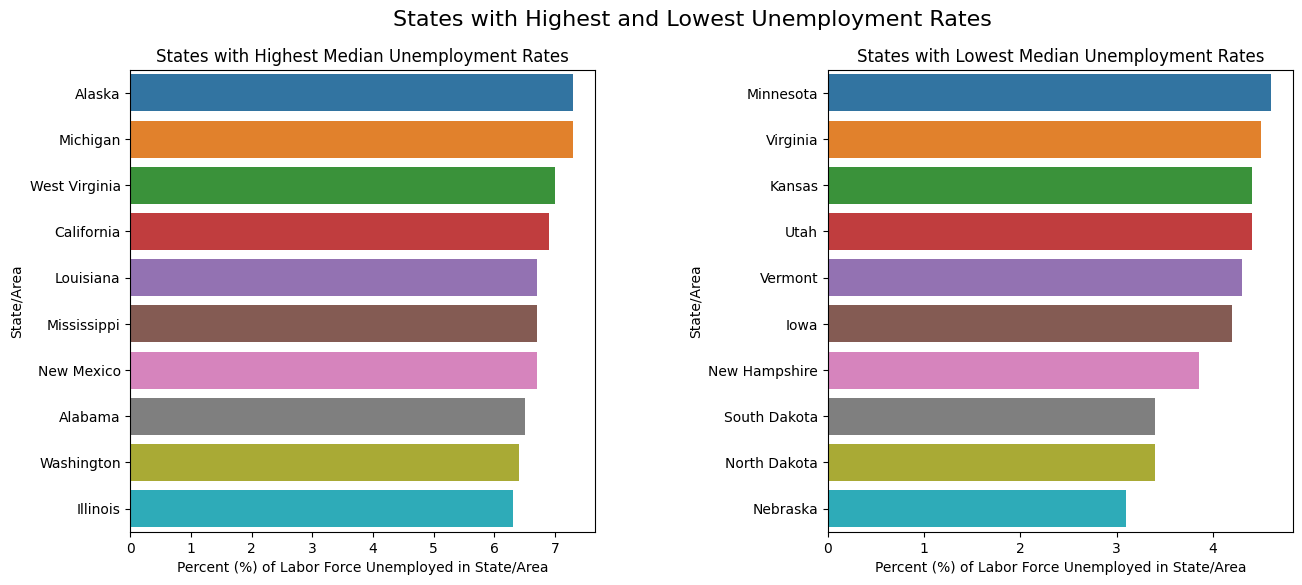

In [66]:
###Plot states with highest and lowest unemployment rates

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('States with Highest and Lowest Unemployment Rates', fontsize=16)
df1 = median_unemp_data.sort_values(by='Percent (%) of Labor Force Unemployed in State/Area', ascending=False).head(10)
df2 = median_unemp_data.sort_values(by='Percent (%) of Labor Force Unemployed in State/Area', ascending=False).tail(10)

sns.barplot(x='Percent (%) of Labor Force Unemployed in State/Area', y='State/Area', data=df1, hue='State/Area', ax=ax[0])
ax[0].set_title('States with Highest Median Unemployment Rates')

sns.barplot(x='Percent (%) of Labor Force Unemployed in State/Area', y='State/Area', data=df2, hue='State/Area', ax=ax[1])
ax[1].set_title('States with Lowest Median Unemployment Rates')

#plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

**What we can see is that Alaska and Nebraska have the highest an lowest median unemployment rates in America respectively. Now lets look at state labor force participation rates.**

In [67]:
median_labor_frc_prt_rate = df.groupby(['State/Area'], as_index=False)\
 [['Percent (%) of Labor Force Employed in State/Area', 'Total Employment in State/Area']].median()
display(median_labor_frc_prt_rate.head())

State/Area  Percent (%) of Labor Force Employed in State/Area  \
0     Alabama                                               55.7   
1      Alaska                                               65.5   
2     Arizona                                               59.2   
3    Arkansas                                               56.1   
4  California                                               60.6   

   Total Employment in State/Area  
0                       1991070.5  
1                        297479.0  
2                       2372693.0  
3                       1197950.0  
4                      15575043.5

In [68]:
fig = make_subplots(rows=1, cols=2)
frame1 = median_labor_frc_prt_rate.sort_values(by='Percent (%) of Labor Force Employed in State/Area', ascending=False).head(10)
frame2 = median_labor_frc_prt_rate.sort_values(by='Percent (%) of Labor Force Employed in State/Area', ascending=False).tail(10)

fig.add_trace(
    go.Bar(y=frame1['Percent (%) of Labor Force Employed in State/Area'], x=frame1['State/Area'], name='States with Highest Median Labor Force Participation Rates'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(y=frame2['Percent (%) of Labor Force Employed in State/Area'], x=frame2['State/Area'], name='States with Lowest Median Labor Force Participation Rates'),
    row=1, col=2
)

fig.update_layout(title_text='States with Highest and Lowest Median Labor Force Participation Rates')
fig.show()

**Now to further visualize this data, lets summarize with box plots for both unemployment rate, and labor force participation rates**

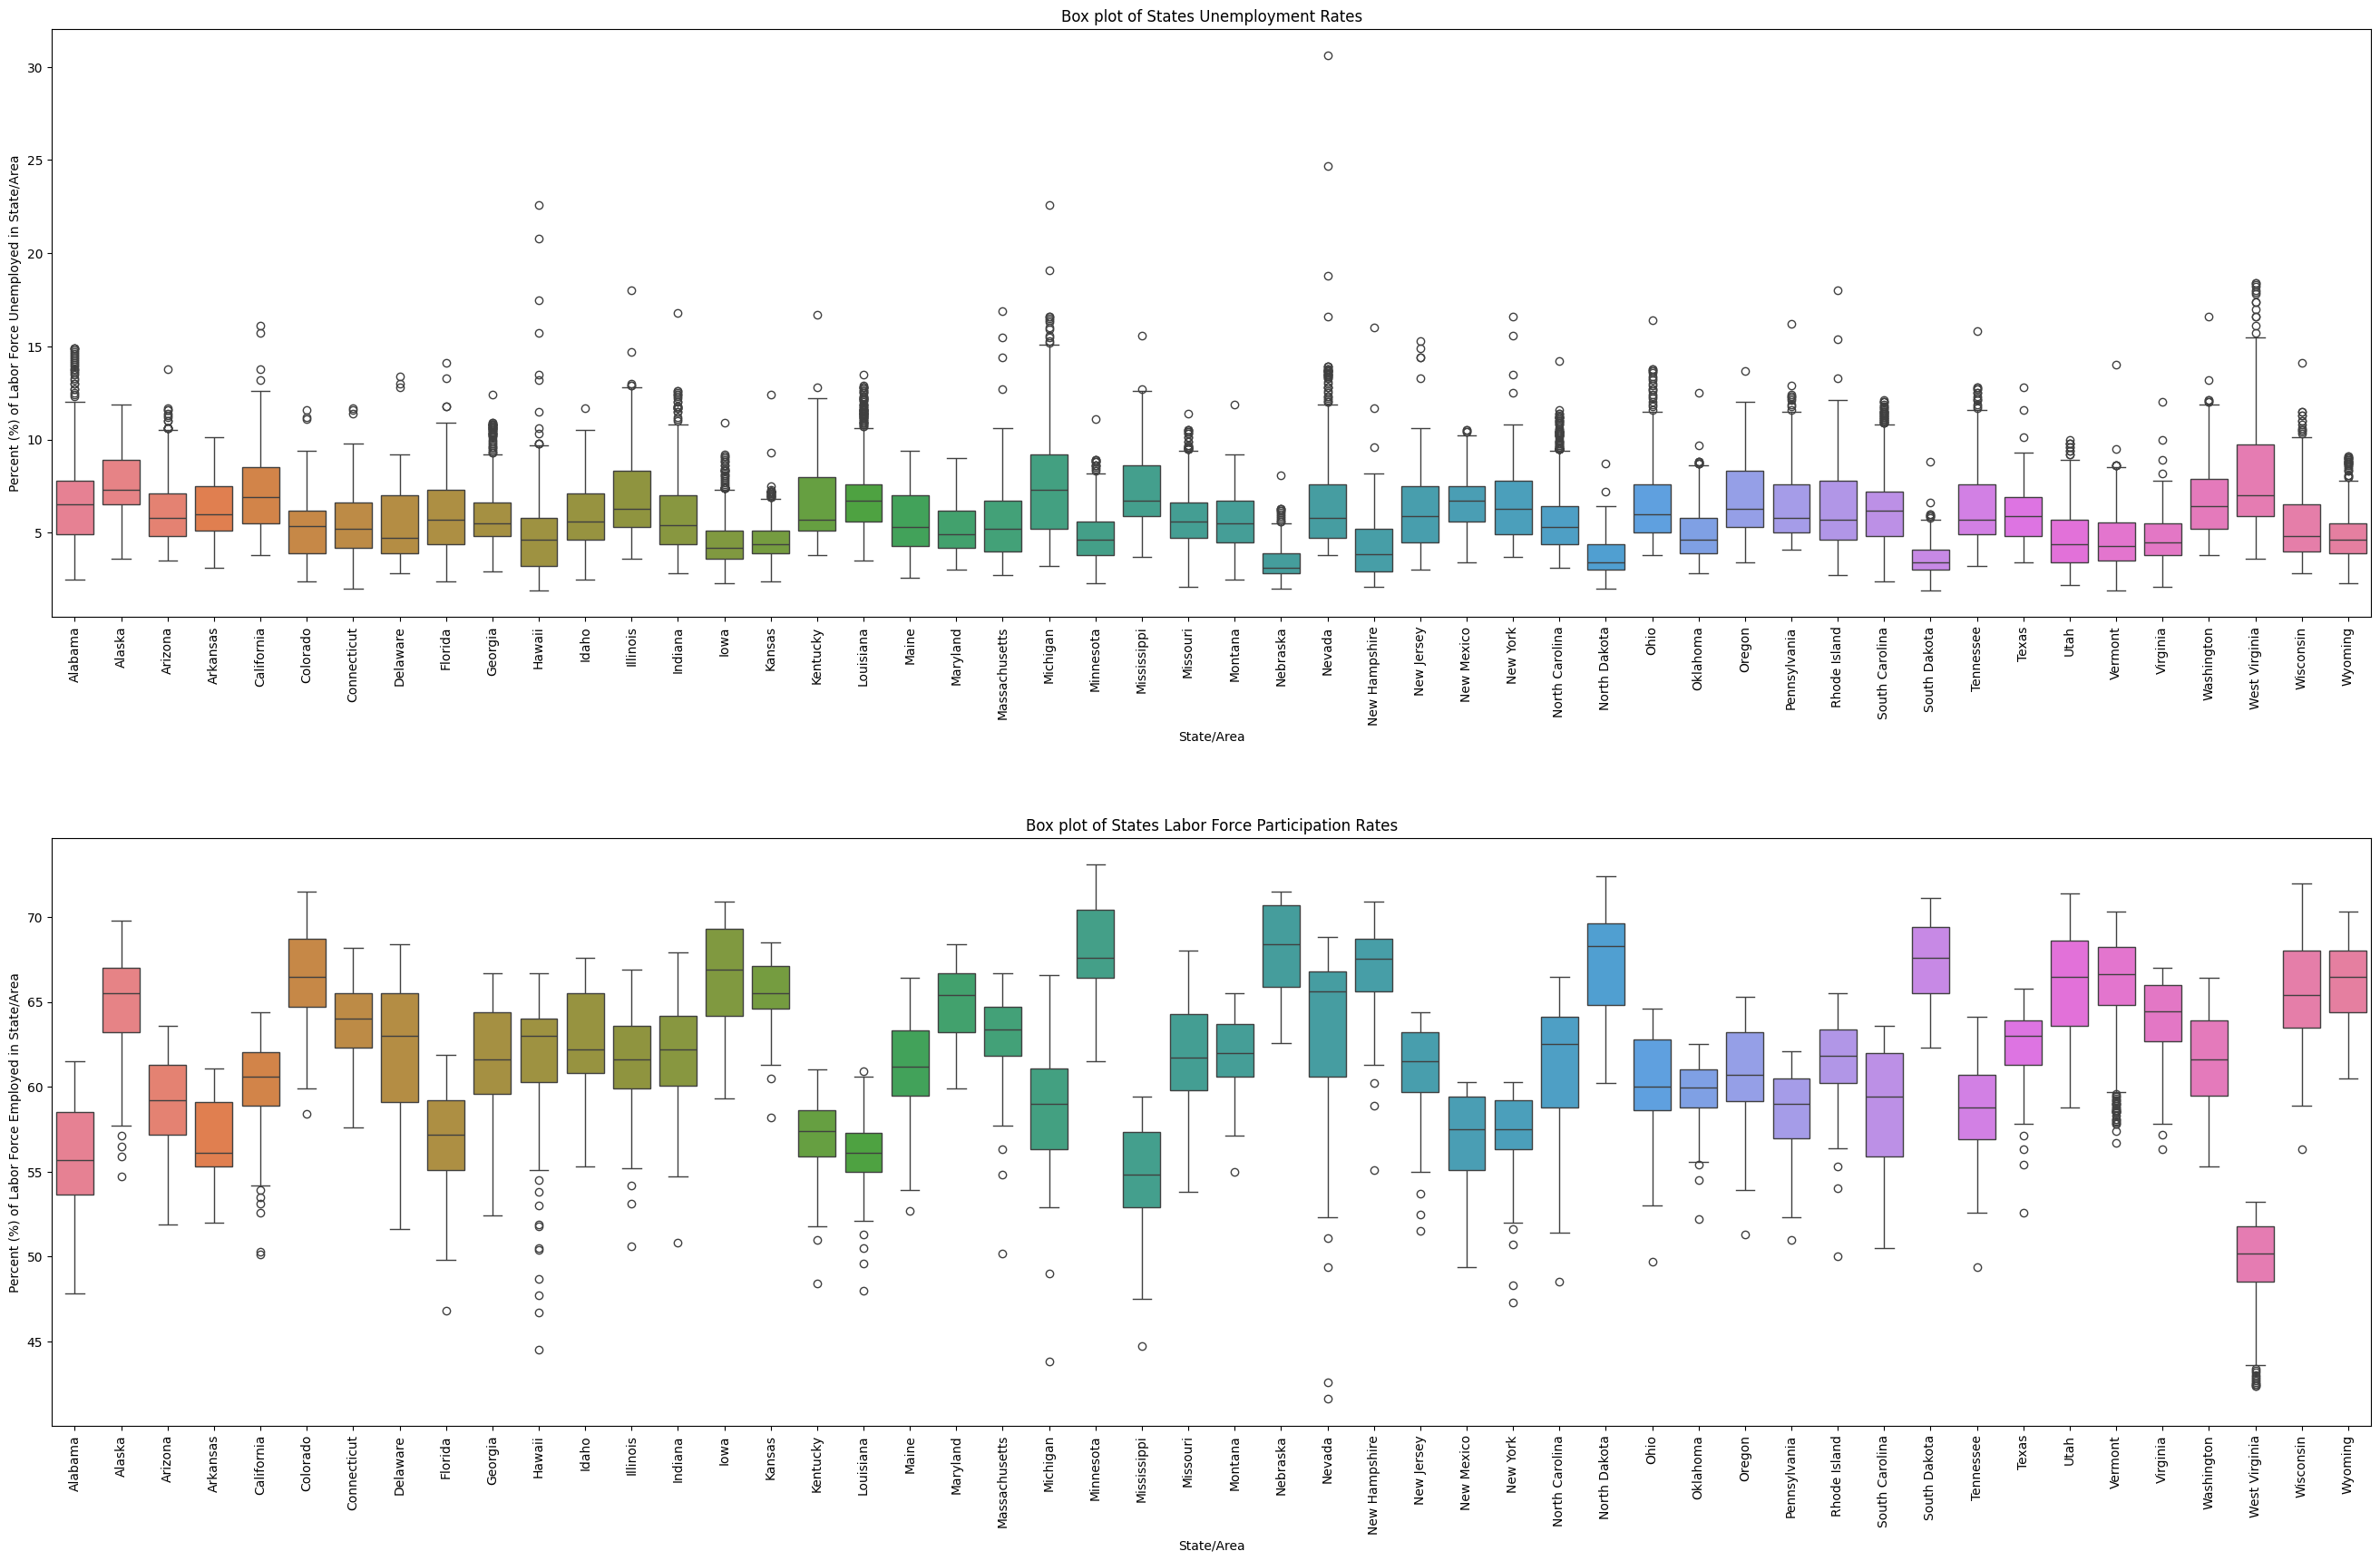

In [69]:
fig, ax = plt.subplots(2, 1, figsize=(33, 20))
sns.boxplot(x='State/Area', y='Percent (%) of Labor Force Unemployed in State/Area', data=df, hue='State/Area', ax=ax[0])
ax[0].set_title('Box plot of States Unemployment Rates') ; ax[0].tick_params(axis='x', rotation=90)

sns.boxplot(x='State/Area', y='Percent (%) of Labor Force Employed in State/Area', data=df, hue='State/Area', ax=ax[1])
ax[1].set_title('Box plot of States Labor Force Participation Rates') ; ax[1].tick_params(axis='x', rotation=90)

plt.subplots_adjust(hspace=0.375)
plt.show()

**What we see is that Nebraska and Mississippi have the highest and lowest labor force participation rates respectively. Now lets make a plot of the unemployment rate trend in every state.**

<Figure size 1800x1200 with 0 Axes>

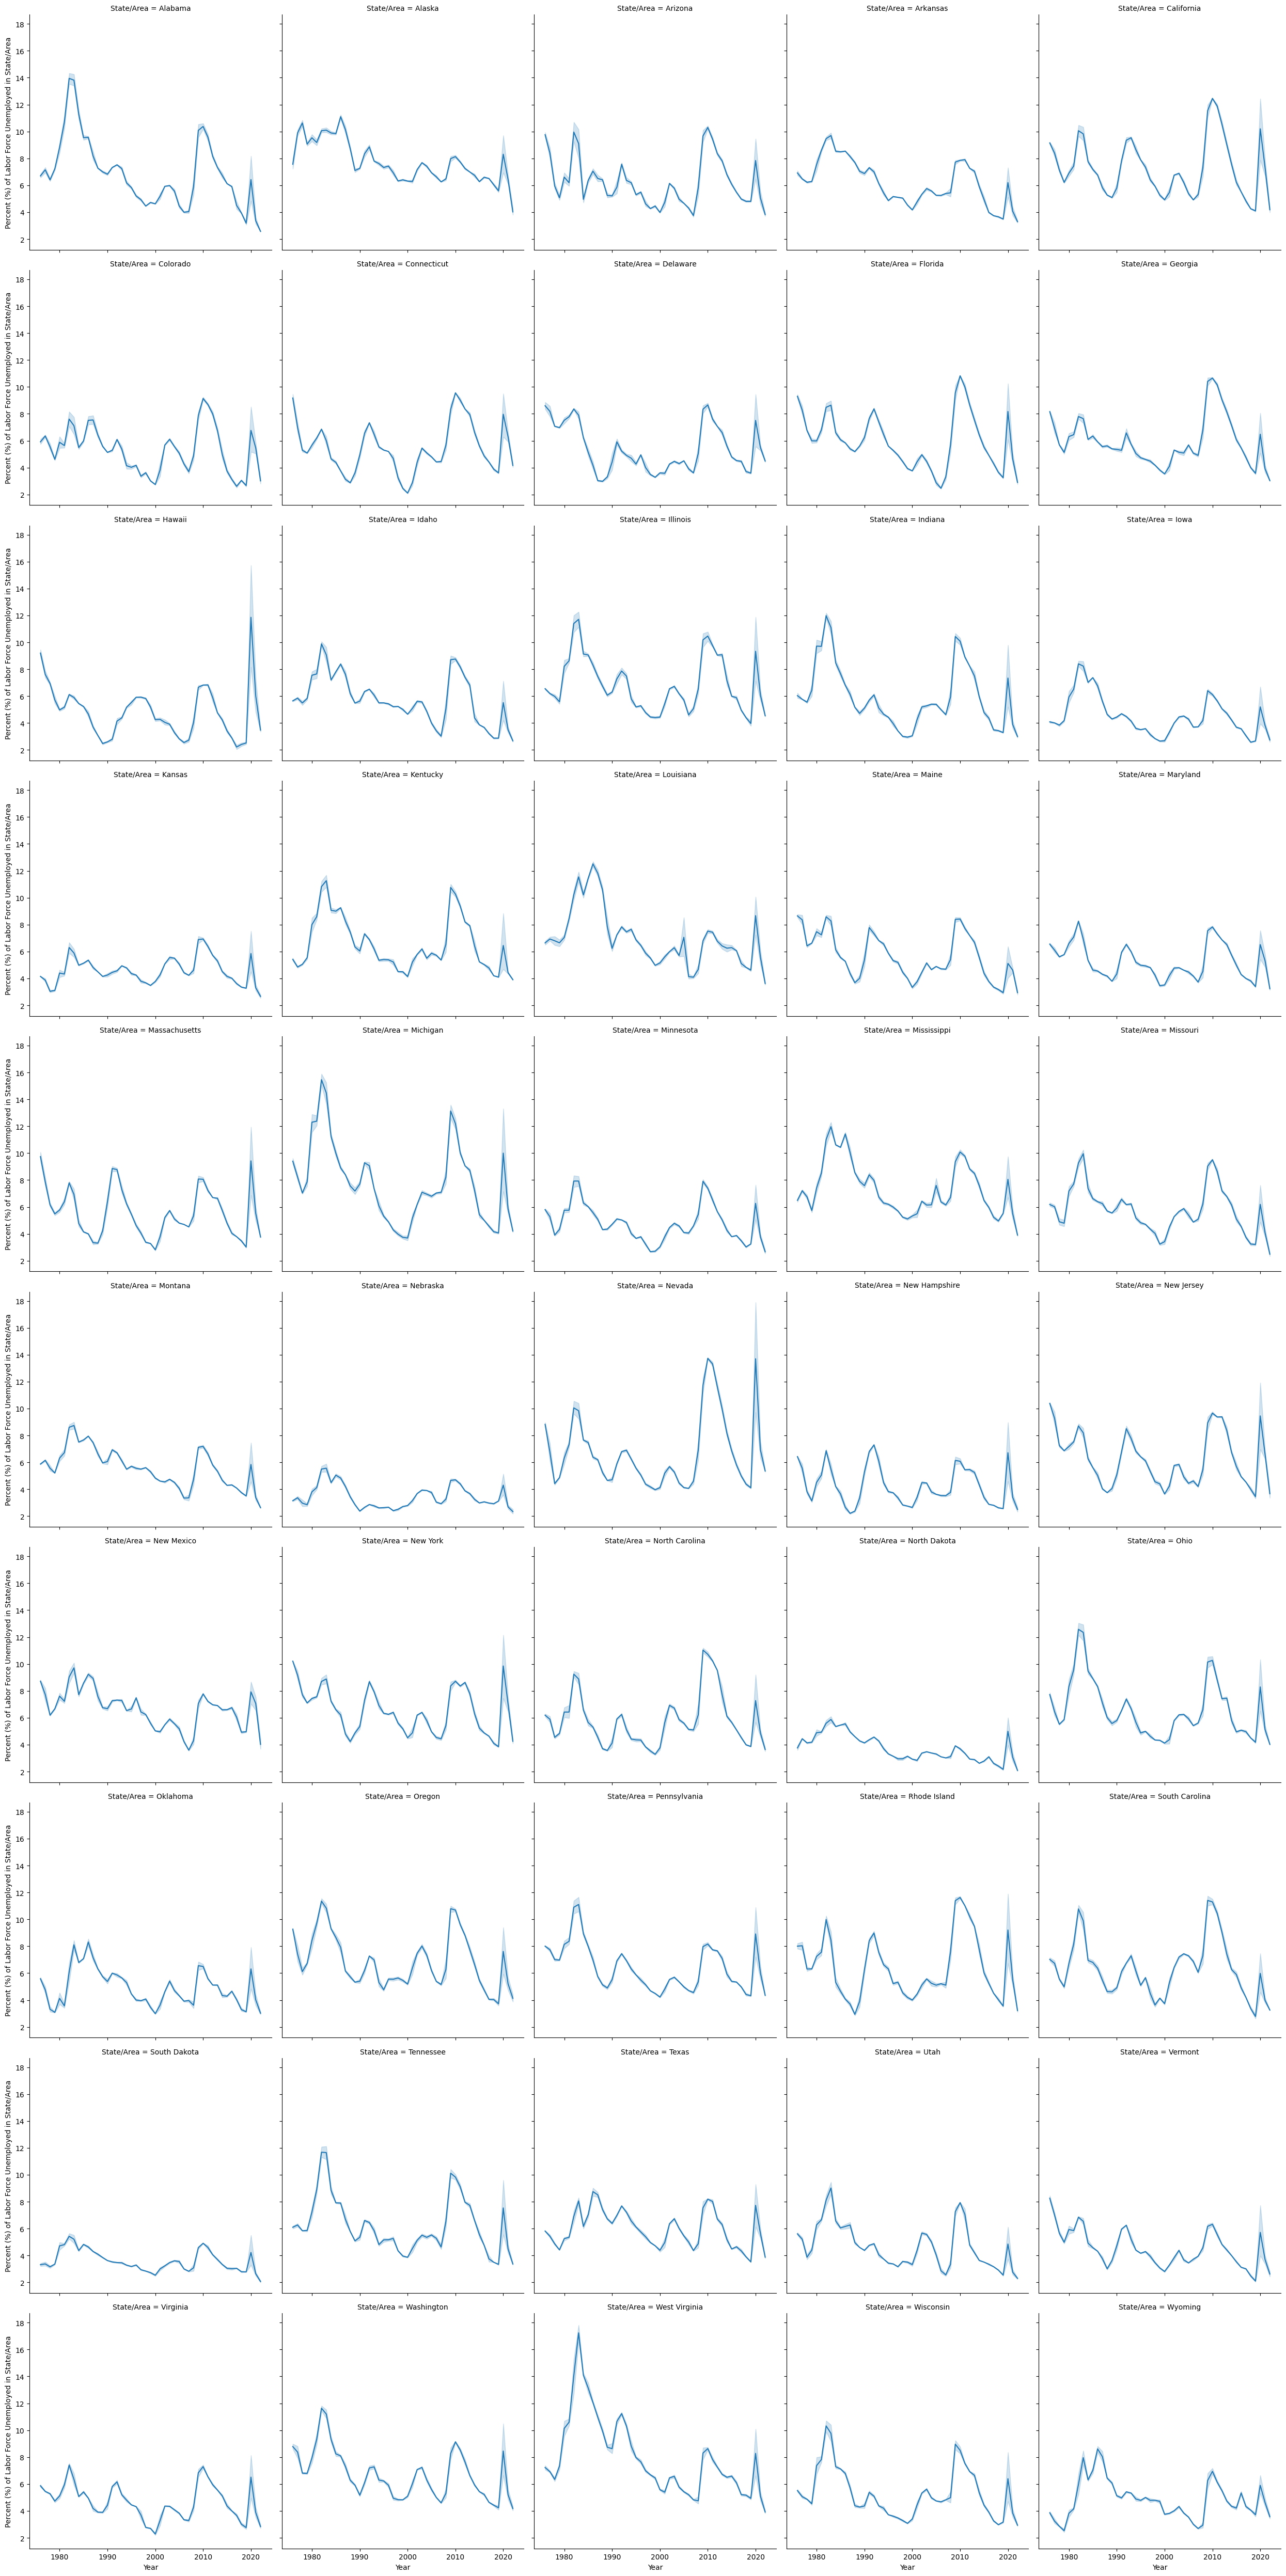

In [70]:
plt.figure(figsize=(18, 12))
sns.relplot(x='Year', y='Percent (%) of Labor Force Unemployed in State/Area', kind='line', data=df, col='State/Area', col_wrap=5)
plt.show()

**Now lets look at the highest unemployent any state has experienced.**

In [71]:
High_Unemp = df.sort_values(by='Percent (%) of Labor Force Unemployed in State/Area', ascending=False).head(10)\
 [['State/Area', 'Year', 'Month', 'Percent (%) of Labor Force Unemployed in State/Area']]

High_Unemp

State/Area  Year  Month  \
28172         Nevada  2020      4   
28225         Nevada  2020      5   
28166       Michigan  2020      4   
28155         Hawaii  2020      4   
28208         Hawaii  2020      5   
28219       Michigan  2020      5   
28278         Nevada  2020      6   
4608   West Virginia  1983      3   
4555   West Virginia  1983      2   
4502   West Virginia  1983      1   

       Percent (%) of Labor Force Unemployed in State/Area  
28172                                               30.6    
28225                                               24.7    
28166                                               22.6    
28155                                               22.6    
28208                                               20.8    
28219                                               19.1    
28278                                               18.8    
4608                                                18.4    
4555                                                18.4    
4502                                                18.3

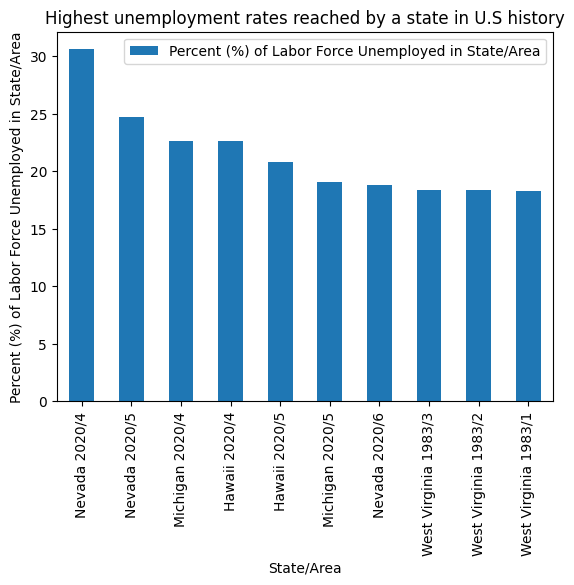

In [72]:
ax = High_Unemp.plot(kind='bar', x='State/Area', y='Percent (%) of Labor Force Unemployed in State/Area')
ax.set_xticklabels(High_Unemp['State/Area'] + ' ' + High_Unemp['Year'].astype(str) + '/' + High_Unemp['Month'].astype(str))
ax.set_xlabel('State/Area')
ax.set_ylabel('Percent (%) of Labor Force Unemployed in State/Area')
ax.set_title('Highest unemployment rates reached by a state in U.S history')
plt.show()

**Now lets try to make some predictions with the random walk method. This method requires us to generate random percent changes based off of the data to predict future values. We will only be doing this for the first month of every year, so yearly unemployment**
**This is not an accurate way to predict futre unemployment, simply based off of percent change/trend rates in the past **

In [73]:
seed(42)
yearly_unemp = df[df['Month'] == 1][['State/Area', 'Year', 'Percent (%) of Labor Force Unemployed in State/Area']]
display(yearly_unemp.head())

State/Area  Year  Percent (%) of Labor Force Unemployed in State/Area
0     Alabama  1976                                                6.6  
1      Alaska  1976                                                7.1  
2     Arizona  1976                                               10.2  
3    Arkansas  1976                                                7.3  
4  California  1976                                                9.2

In [74]:
states = yearly_unemp['State/Area'].unique()
print(states)
print("*******Nevada, Michigan, and Ohio data is most skewed, so it is important to get its index********")

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
*******Nevada, Michigan, and Ohio data is most skewed, so it is important to get its index********


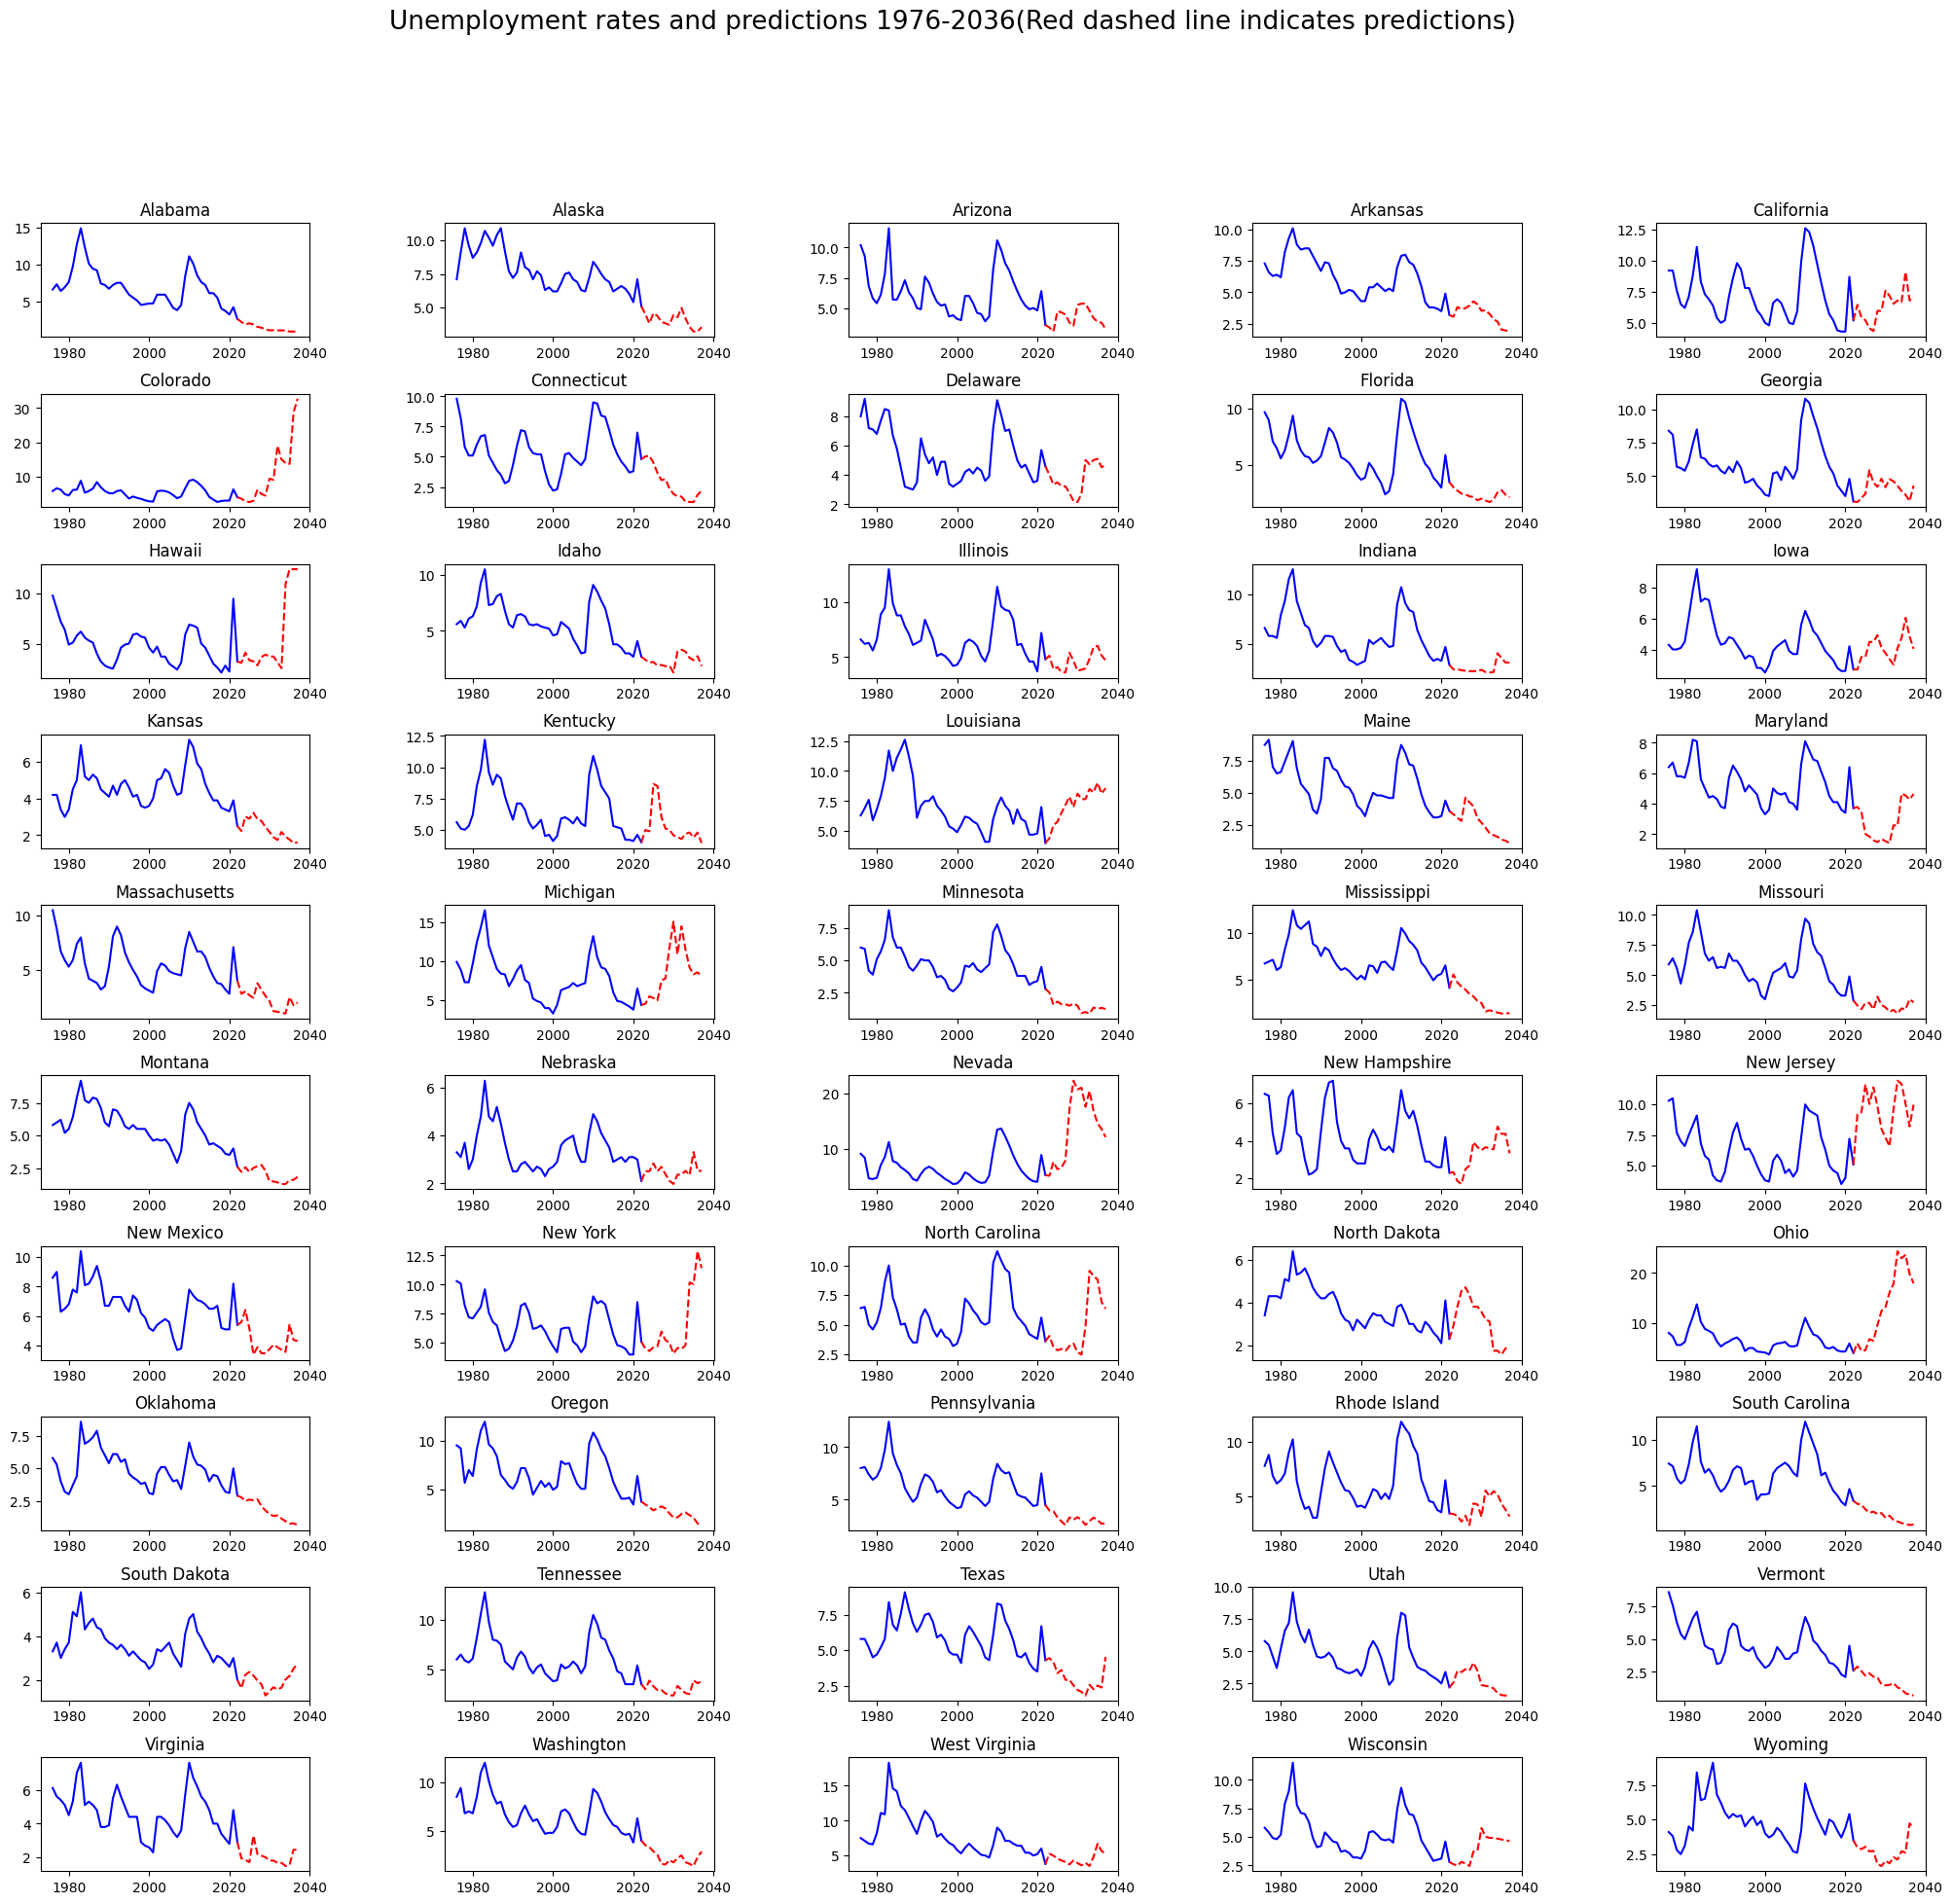

In [75]:
fig, ax = plt.subplots(10, 5, figsize=(25, 22))
fig.suptitle('Unemployment rates and predictions 1976-2036(Red dashed line indicates predictions)', fontsize=19)
for i in range(len(states)):
  state_data = yearly_unemp[yearly_unemp['State/Area'] == states[i]]
  state_data_pct_change = state_data['Percent (%) of Labor Force Unemployed in State/Area'].pct_change().add(1).dropna()
  last = state_data.iloc[-1:]

  new_df = pd.DataFrame({
      'State/Area': [states[i] for x in range(15)],
      'Year': [x+2023 for x in range(15)],
      'Percent (%) of Labor Force Unemployed in State/Area': choice(state_data_pct_change, size=15)
  })
  joined = pd.concat([last, new_df])
  joined['Percent (%) of Labor Force Unemployed in State/Area'] = joined['Percent (%) of Labor Force Unemployed in State/Area'].cumprod()

  row = i // 5
  col = i % 5
  ax[row, col].plot(state_data['Year'], state_data['Percent (%) of Labor Force Unemployed in State/Area'], color='b')
  ax[row, col].plot(joined['Year'], joined['Percent (%) of Labor Force Unemployed in State/Area'], color='r', linestyle='--')
  ax[row, col].set_title(states[i])


plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

**Lets do the same thing with Labor Force Participation Rate**

In [76]:
neb = df[df['State/Area'] == 'Nebraska'].groupby(['State/Area', 'Year'], as_index=False)\
 ['Percent (%) of Labor Force Employed in State/Area'].median()
display(neb.tail())

State/Area  Year  Percent (%) of Labor Force Employed in State/Area
42   Nebraska  2018                                               67.8
43   Nebraska  2019                                               68.2
44   Nebraska  2020                                               67.0
45   Nebraska  2021                                               67.6
46   Nebraska  2022                                               68.1

In [77]:
pct_changes = neb['Percent (%) of Labor Force Employed in State/Area'].pct_change().add(1).dropna()
display(pct_changes.head())

1    1.018239
2    1.009346
3    0.998457
4    0.986862
5    1.002349
Name: Percent (%) of Labor Force Employed in State/Area, dtype: float64

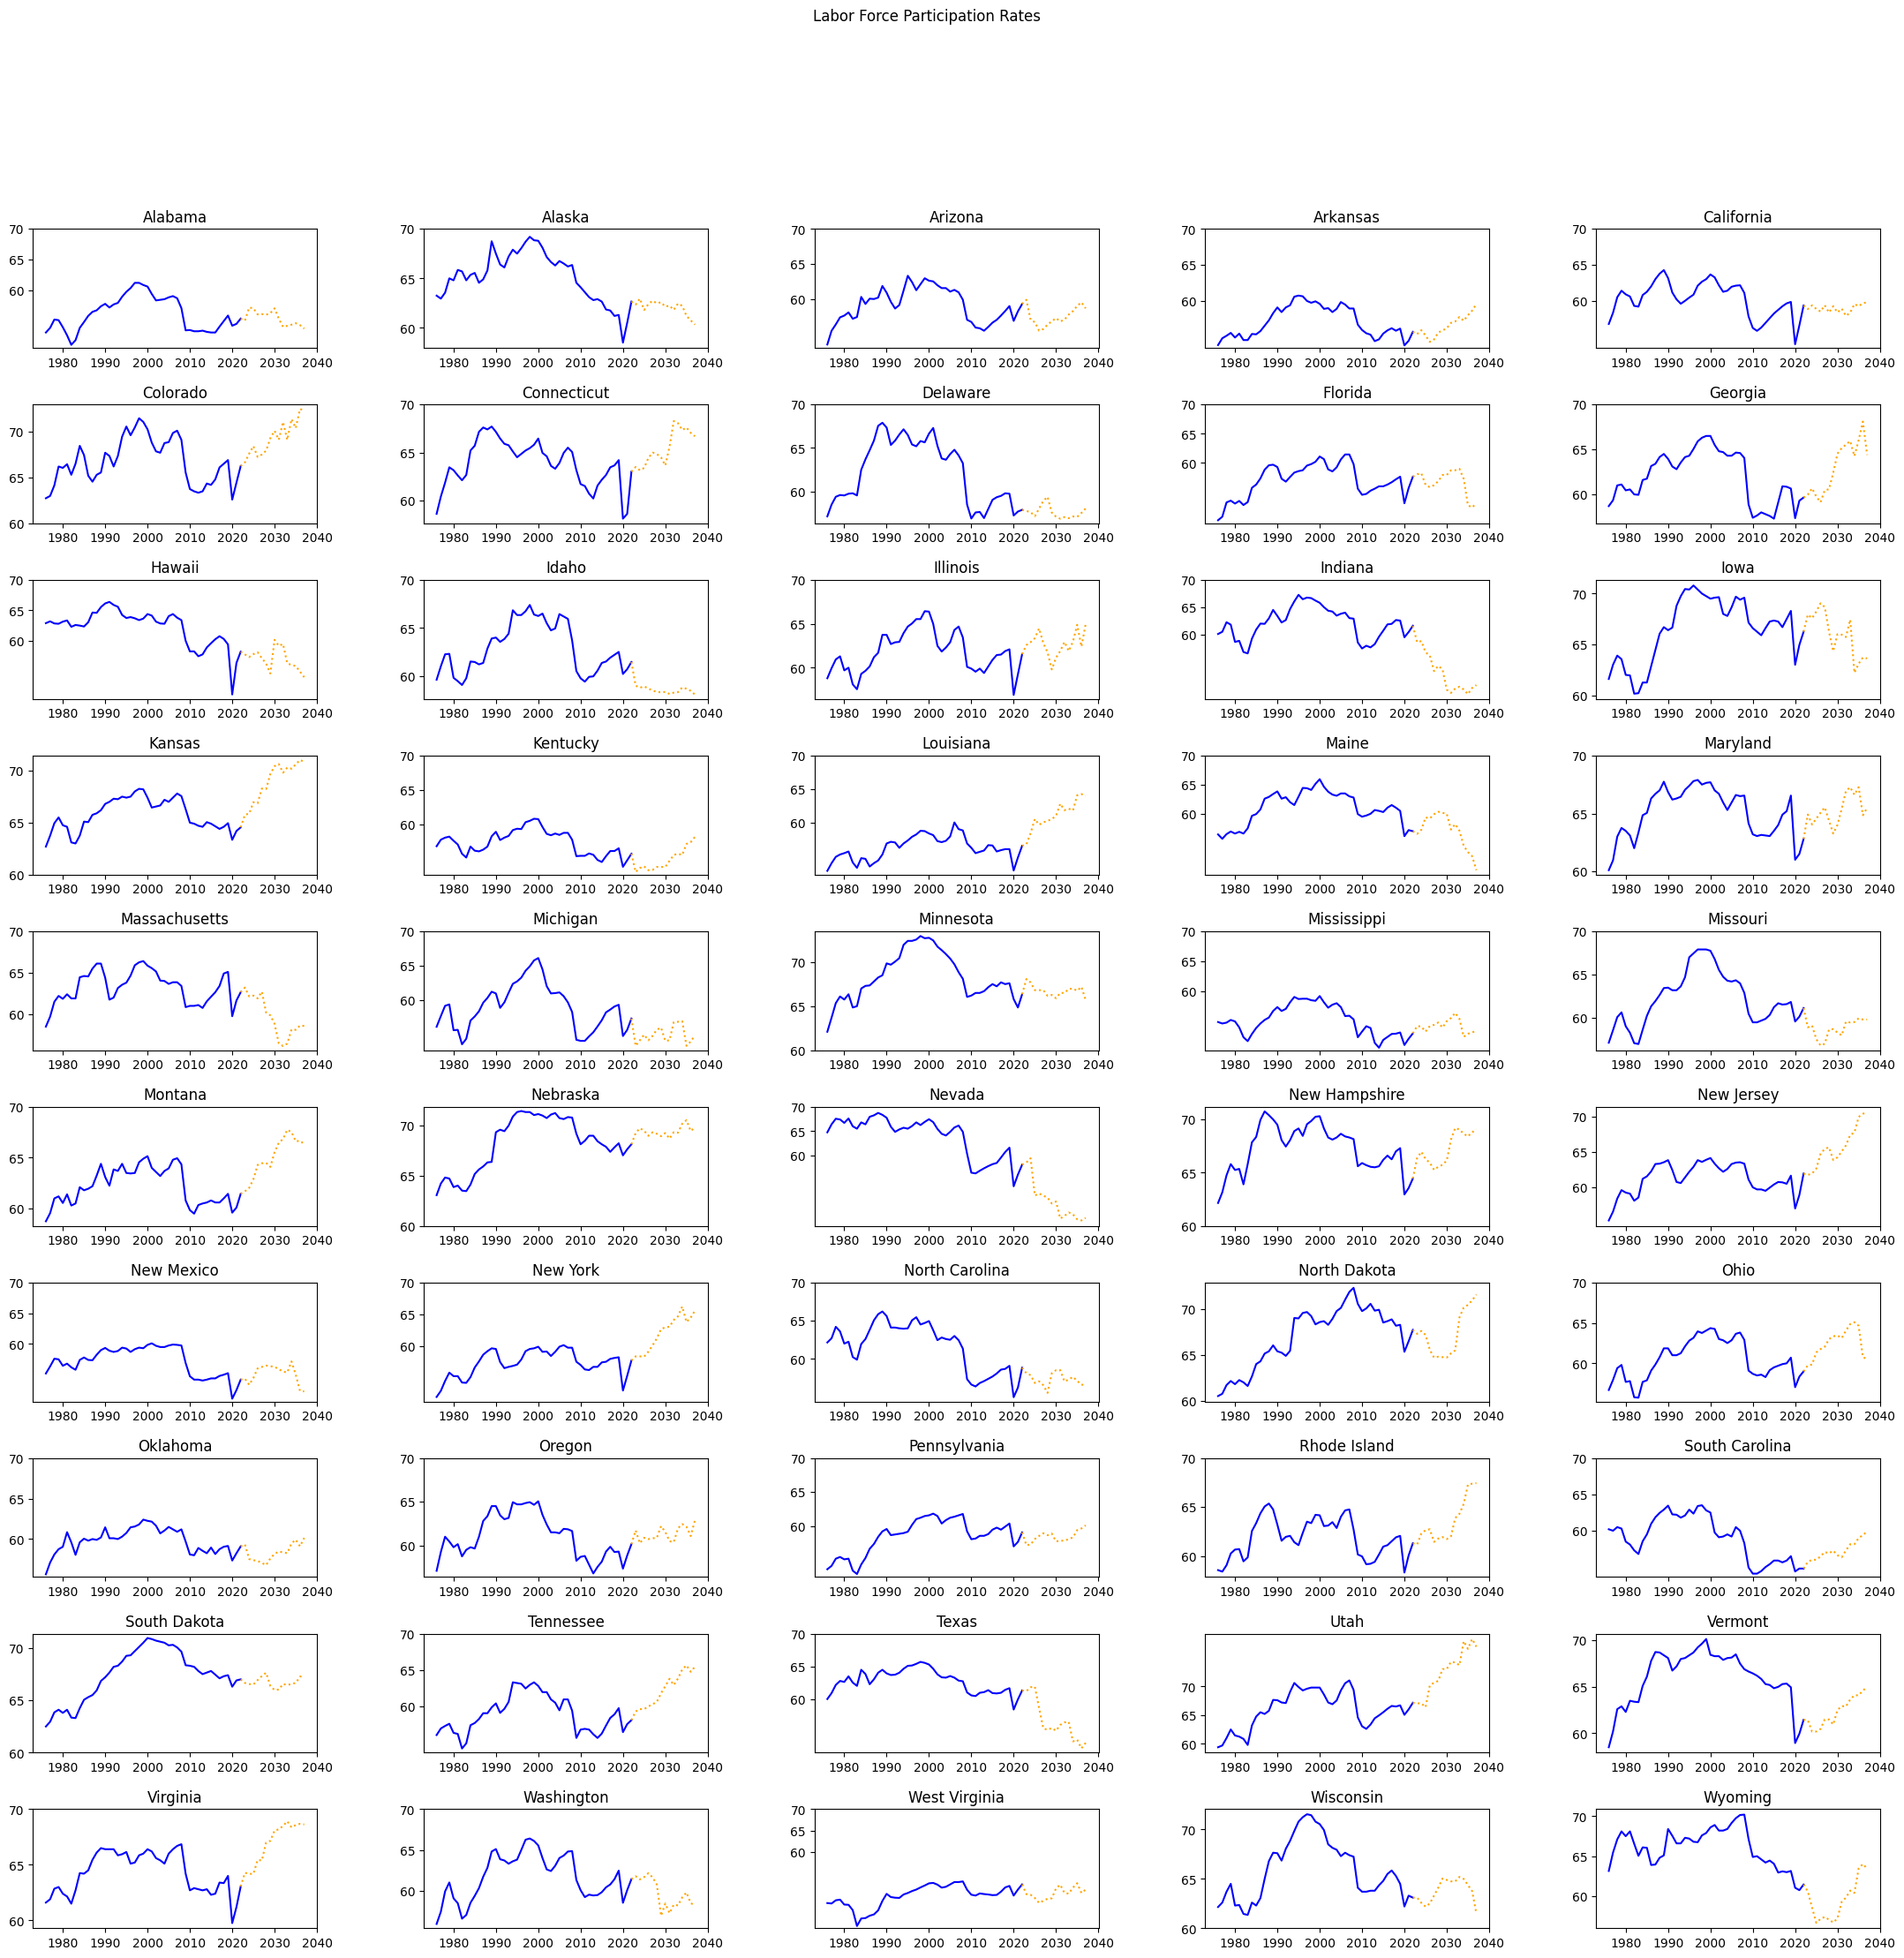

In [78]:
fig, ax = plt.subplots(10, 5, figsize=(27, 25))
fig.suptitle('Labor Force Participation Rates')

for i in range(50):
  lfpr = df[(df['State/Area'] == states[i])].groupby(['State/Area', 'Year'], as_index=False)['Percent (%) of Labor Force Employed in State/Area'].median()
  pct_changes = lfpr['Percent (%) of Labor Force Employed in State/Area'].pct_change().add(1).dropna()
  lst = lfpr.iloc[-1:]

  n_lfpr = pd.DataFrame({
      'State/Area': [states[i] for x in range(15)],
      'Year': [x+2023 for x in range(15)],
      'Percent (%) of Labor Force Employed in State/Area' : choice(pct_changes, size=15)
  })

  join_pred = pd.concat([lst, n_lfpr])
  join_pred['Percent (%) of Labor Force Employed in State/Area'] = join_pred['Percent (%) of Labor Force Employed in State/Area'].cumprod()
  #join_pred = join_pred.tail(join_pred.shape[0]-1)

  row = i // 5
  col = i % 5
  ax[row, col].plot(lfpr['Year'], lfpr['Percent (%) of Labor Force Employed in State/Area'], color='b')
  ax[row, col].plot(join_pred['Year'], join_pred['Percent (%) of Labor Force Employed in State/Area'], color='orange', linestyle=':')
  ax[row, col].set_title(states[i])
  ax[row, col].set_yticks(np.arange(60, 71, 5))


plt.subplots_adjust(wspace=0.375, hspace=0.475)
plt.show()

**Now lets look at correlations amongst this data**

<Axes: >

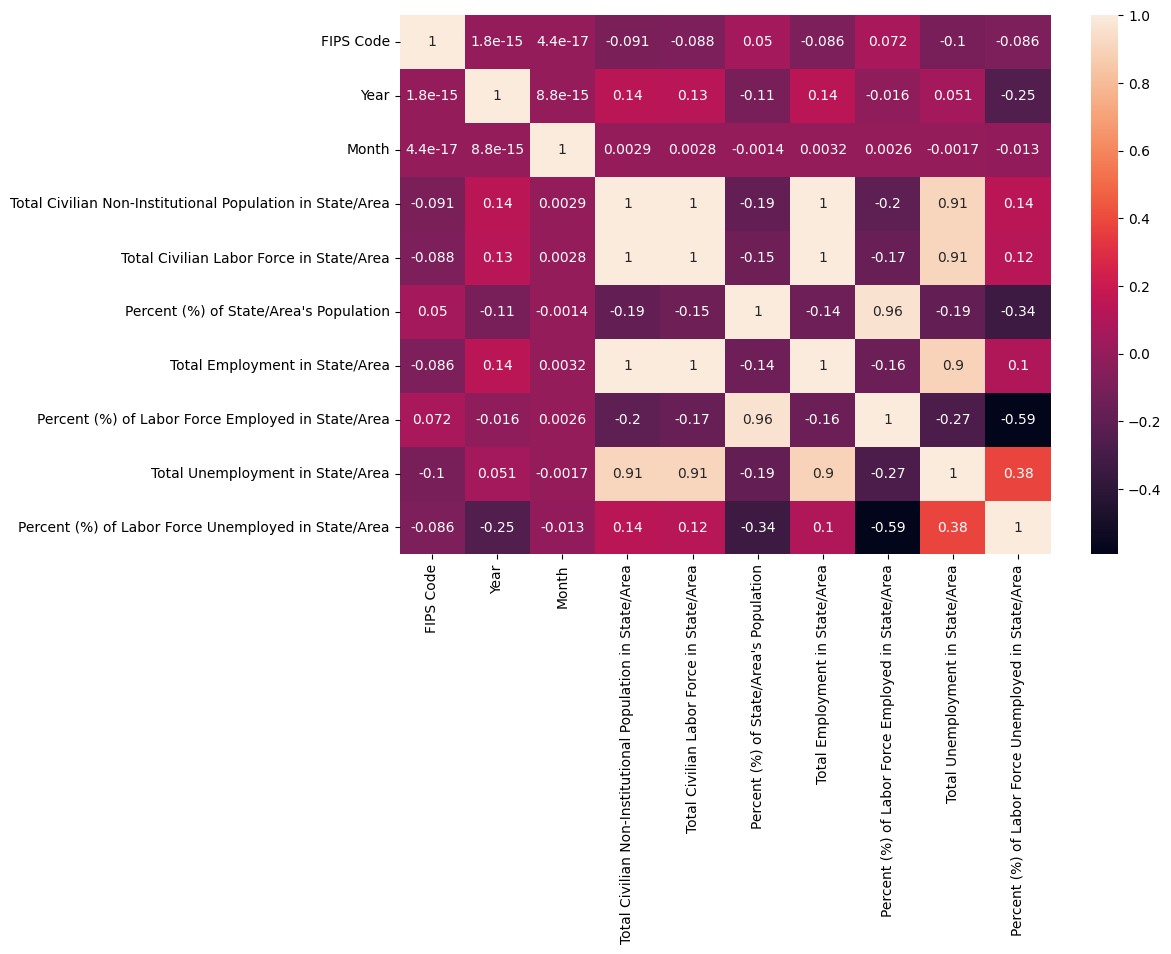

In [79]:
plt.figure(figsize=(10.5, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True)

**As we can see from the heatmap above, there are many strong correlations in the dataset. Lets run a linear regression model on the variables, "Percent (%) of Labor Force Employed in State/Area", and "Percent (%) of Labor Force Unemployed in State/Area".**

<Axes: xlabel='Percent (%) of Labor Force Unemployed in State/Area', ylabel='Percent (%) of Labor Force Employed in State/Area'>

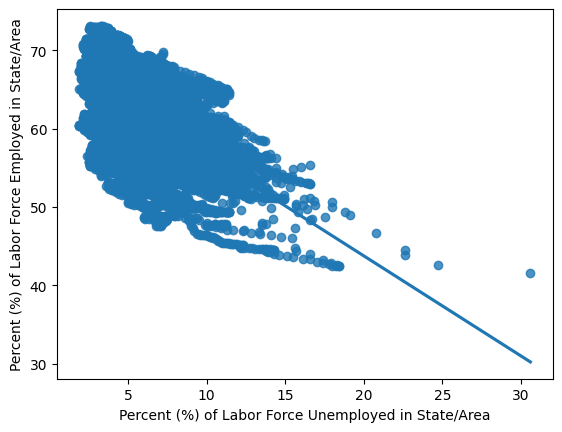

In [80]:
sns.regplot(x='Percent (%) of Labor Force Unemployed in State/Area', y='Percent (%) of Labor Force Employed in State/Area', data=df, ci=None)
###DATA IS RIGHT SKEWED SO WE HAVE TO SQUARE ROOT X VARIABLE

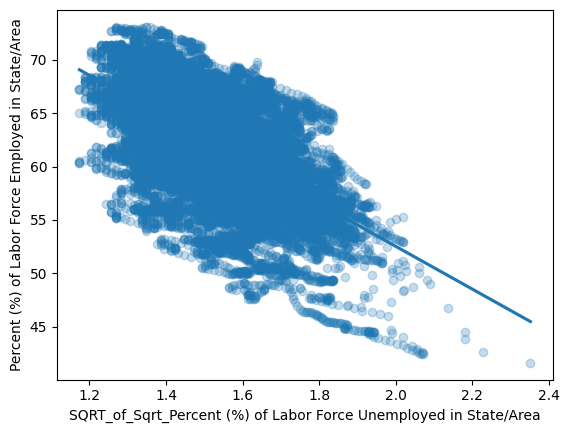

In [81]:
df['SQRT_of_Sqrt_Percent (%) of Labor Force Unemployed in State/Area'] = np.sqrt(np.sqrt(df['Percent (%) of Labor Force Unemployed in State/Area']))
sns.regplot(x='SQRT_of_Sqrt_Percent (%) of Labor Force Unemployed in State/Area', y='Percent (%) of Labor Force Employed in State/Area', data=df, ci=None, scatter_kws={'alpha': 0.25})
plt.show()
# WE SEE THAT THERE IS A NEGATIVE CORRELATION(-0.6) BETWEEN LABOR FORCE PARTICIPATION RATES AND UNEMPLOYMENT RATES. LETS MAKE A MODEL

**Lets assess the fit with a residplot**

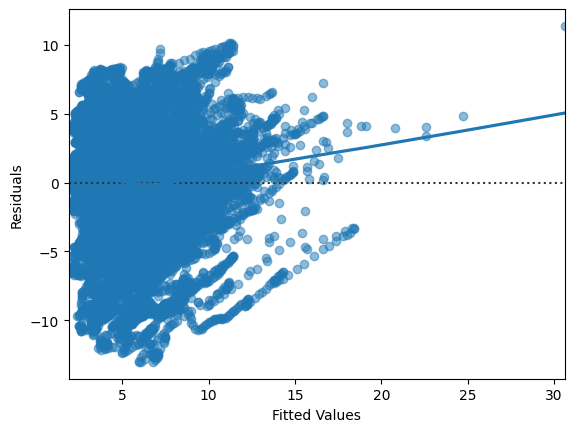

In [82]:
sns.residplot(x='Percent (%) of Labor Force Unemployed in State/Area', y='Percent (%) of Labor Force Employed in State/Area', data=df, lowess=True, scatter_kws={'alpha': 0.5})
plt.xlabel('Fitted Values') ; plt.ylabel('Residuals')
plt.show()

In [83]:
df.rename(columns={'Percent (%) of Labor Force Unemployed in State/Area': 'Unemployment_Rate', 'Percent (%) of Labor Force Employed in State/Area': 'LFPR'}, inplace=True)
mdl_lfpr_v_unemp = ols('LFPR ~ Unemployment_Rate', data=df).fit()
print(mdl_lfpr_v_unemp.summary())
print("******************************")
print(mdl_lfpr_v_unemp.params)

                            OLS Regression Results                            
Dep. Variable:                   LFPR   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                 1.534e+04
Date:                Thu, 09 Jan 2025   Prob (F-statistic):               0.00
Time:                        00:00:02   Log-Likelihood:                -77405.
No. Observations:               28200   AIC:                         1.548e+05
Df Residuals:                   28198   BIC:                         1.548e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            69.2866      0.06

In [84]:
display(mdl_lfpr_v_unemp.resid.to_frame('Residuals'))
print("************************************************")
display(mdl_lfpr_v_unemp.fittedvalues.to_frame('Fitted_Values'))

Residuals
0      -7.659129
1       3.879317
2      -2.862319
3      -6.265305
4      -0.739211
...          ...
29887  -2.228250
29888  -2.240602
29889 -11.651358
29890  -2.855939
29891  -3.006737

[28200 rows x 1 columns]

************************************************


Fitted_Values
0          60.859129
1          60.220683
2          56.262319
3          59.965305
4          57.539211
...              ...
29887      65.328250
29888      63.540602
29889      64.051358
29890      65.455939
29891      64.306737

[28200 rows x 1 columns]

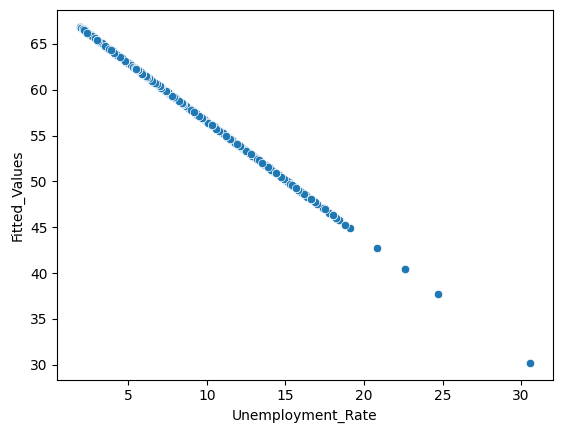

In [85]:
#DEMONSTRATION
fitted = mdl_lfpr_v_unemp.fittedvalues.to_frame('Fitted_Values')
fitted = pd.concat([df['Unemployment_Rate'], fitted], axis=1)
sns.scatterplot(x='Unemployment_Rate', y='Fitted_Values', data=fitted)
plt.show()

**Now lets visualize and display the United States National Average Unemployment**





Year  Unemployment_Rate
0  1976           7.025500
1  1977           6.541333
2  1978           5.603000
3  1979           5.477667
4  1980           6.805667

**********************************


<ipython-input-86-aaef094cee1f>:10: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-86-aaef094cee1f>:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



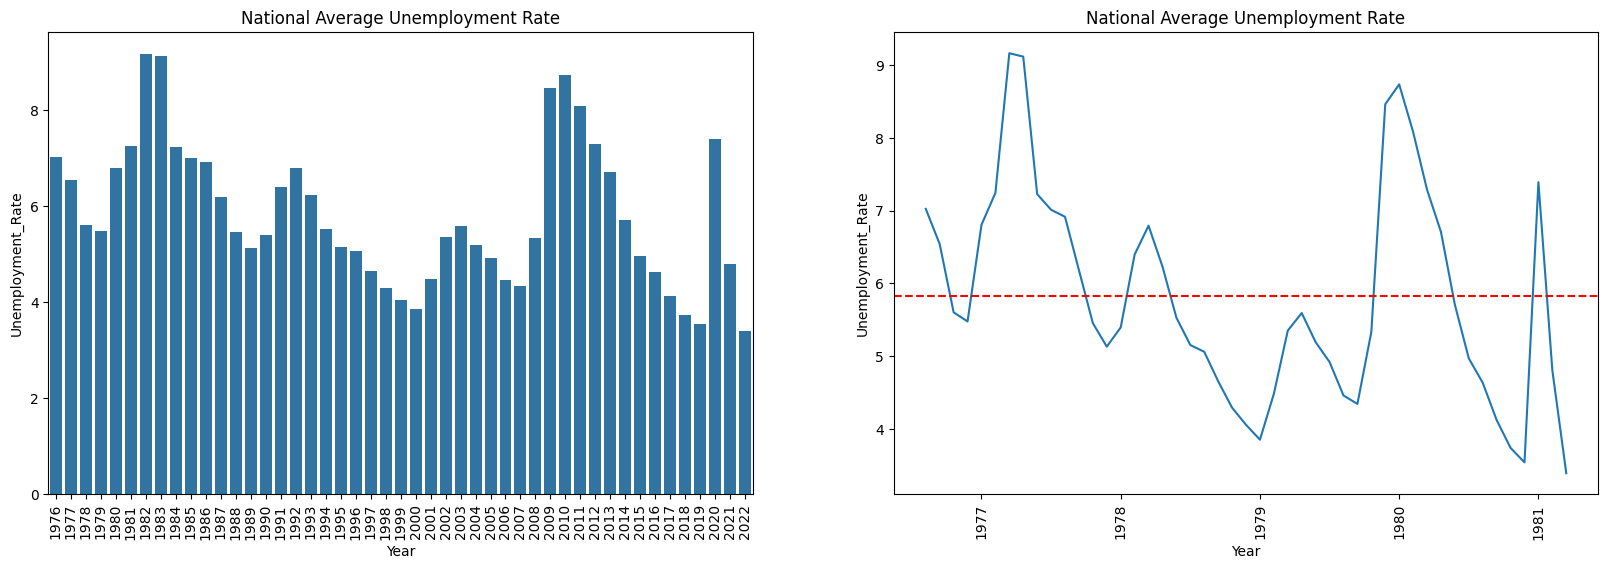

In [86]:
nat_avg_unep = df.groupby(['Year'], as_index=False)['Unemployment_Rate'].mean()
display(nat_avg_unep.head())
print("**********************************")
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.lineplot(x='Year', y='Unemployment_Rate', data=nat_avg_unep, ax=ax[1])
sns.barplot(x='Year', y='Unemployment_Rate', data=nat_avg_unep, ax=ax[0])
ax[1].axhline(y=nat_avg_unep['Unemployment_Rate'].mean(), color='red', linestyle='--')

ax[0].set_title('National Average Unemployment Rate')
ax[0].set_xticklabels(nat_avg_unep['Year'], rotation=90)
ax[1].set_xticklabels(nat_avg_unep['Year'], rotation=90)
ax[1].set_title('National Average Unemployment Rate')
plt.show()

**Now lets look at autocorrelation for specifically unemployment rate in the dataset. Autocorrelation refers to the degree of similarity between the values of the same variables over successive time intervals.**

**We can see that he autocorrelation value for unemployment rate is the highest with a value of 0.49. An autocorrelation of 0.49 suggests that the values of the time series have a moderate tendency to remain similar to how they were a certain number of lags ago. Lets graph this concept.**

Since we know the autocorrelation and genral trend of the national unemployment, lets now do some time series analysis on this data. Lets do a simple Auto Regressive Model to predict the unemployment data.

Lets see which order AR model we should use based off of the BIC value

Since the first(1) value is the lowest, we will use a AR 1 model to forcast unemployment

The parameters can be hard to read. The first one, const at 5.76 mean the mean the series flucuates at. The nest, ar.L1 shows how related today's unemployment rate is with previous dates/years, which in this case is strong. The last parameter, sigma2, shows indicated variability.

**Now lets looks at outliers in the data for the Unemployment Rate and Labor Force Participation Rate columns.**




In [87]:
unep_lfpr = df[['Unemployment_Rate', 'LFPR']]
display(unep_lfpr.head())
print("*******************************************")
print(iqr(unep_lfpr['Unemployment_Rate']).round(2))
print("*******************************************")
print(iqr(unep_lfpr['LFPR']).round(2))

Unemployment_Rate  LFPR
0                6.6  53.2
1                7.1  64.1
2               10.2  53.4
3                7.3  53.7
4                9.2  56.8

*******************************************
2.7
*******************************************
6.4


In [88]:
lower_threshold_unemp = np.quantile(df.Unemployment_Rate, 0.25) - (1.5 * iqr(df.Unemployment_Rate)).round(2)
upper_threshold_unemp = np.quantile(df.Unemployment_Rate, 0.75) + (1.5 * iqr(df.Unemployment_Rate))
print("The lower Threshold for outliers for Unemployment Rate is:", lower_threshold_unemp)
print("The upper Threshold for outliers for Unemployment Rate is:", upper_threshold_unemp)

The lower Threshold for outliers for Unemployment Rate is: 0.25
The upper Threshold for outliers for Unemployment Rate is: 11.05


In [89]:
lower_threshol_lfpr = round(np.quantile(df.LFPR, 0.25) - (1.5 * iqr(df.LFPR)), 2)
upper_threshold_lfpr = round(np.quantile(df.LFPR, 0.75) + (1.5 * iqr(df.LFPR)), 2)
print("The lower Threshold for outliers for Labor Force Participation Rate is:", lower_threshol_lfpr)
print("The upper Threshold for outliers for Labor Force Participation Rate is:", upper_threshold_lfpr)

The lower Threshold for outliers for Labor Force Participation Rate is: 49.2
The upper Threshold for outliers for Labor Force Participation Rate is: 74.8


**What we see are the outliers in the dataset involving Unemployment Rate and Labor Force Participation Rate. For unemployment rates, outliers are those that are lower than 0.25 and higher than 11.05. For Labor Force Participation Rates, outliers are those lower than 49.2 and higher than 74.8.**

In [90]:
unep_lfpr['Unemp_outlier'] = ((unep_lfpr['Unemployment_Rate'] < lower_threshold_unemp) | (unep_lfpr['Unemployment_Rate'] > upper_threshold_unemp))
unep_lfpr['LFPR_outlier'] = ((unep_lfpr['LFPR'] < lower_threshol_lfpr) | (unep_lfpr['LFPR'] > upper_threshold_lfpr))
unep_lfpr

<ipython-input-90-014025760d08>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-90-014025760d08>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Unemployment_Rate  LFPR  Unemp_outlier  LFPR_outlier
0                    6.6  53.2          False         False
1                    7.1  64.1          False         False
2                   10.2  53.4          False         False
3                    7.3  53.7          False         False
4                    9.2  56.8          False         False
...                  ...   ...            ...           ...
29887                3.1  63.1          False         False
29888                4.5  61.3          False         False
29889                4.1  52.4          False         False
29890                3.0  62.6          False         False
29891                3.9  61.3          False         False

[28200 rows x 4 columns]

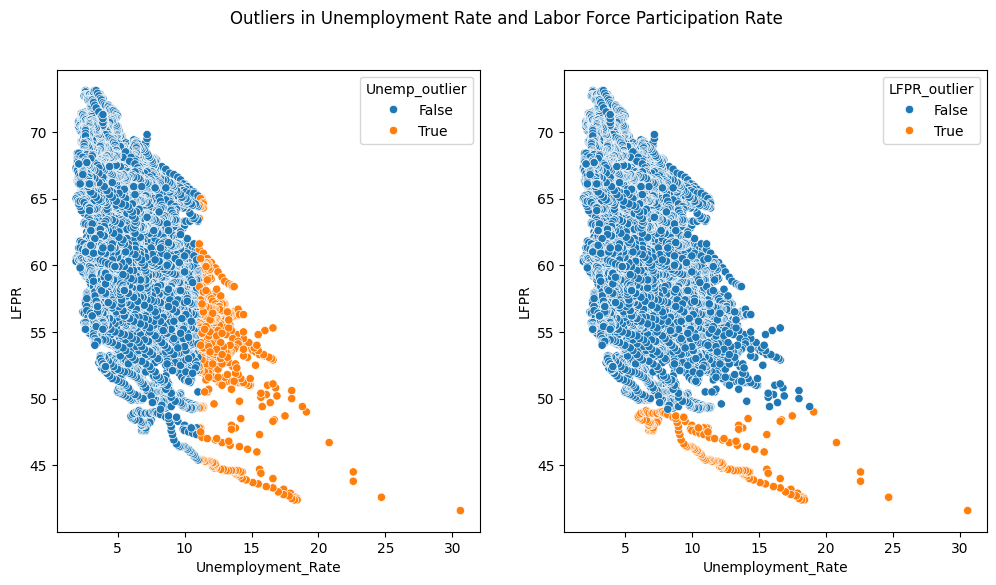

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data=unep_lfpr, x='Unemployment_Rate', y='LFPR', hue='Unemp_outlier', ax=ax[0])
sns.scatterplot(data=unep_lfpr, x='Unemployment_Rate', y='LFPR', hue='LFPR_outlier', ax=ax[1])
plt.suptitle('Outliers in Unemployment Rate and Labor Force Participation Rate')
plt.show()

**Now to finish off this project, lets look at some probabilities and statistics with scipy.norm**

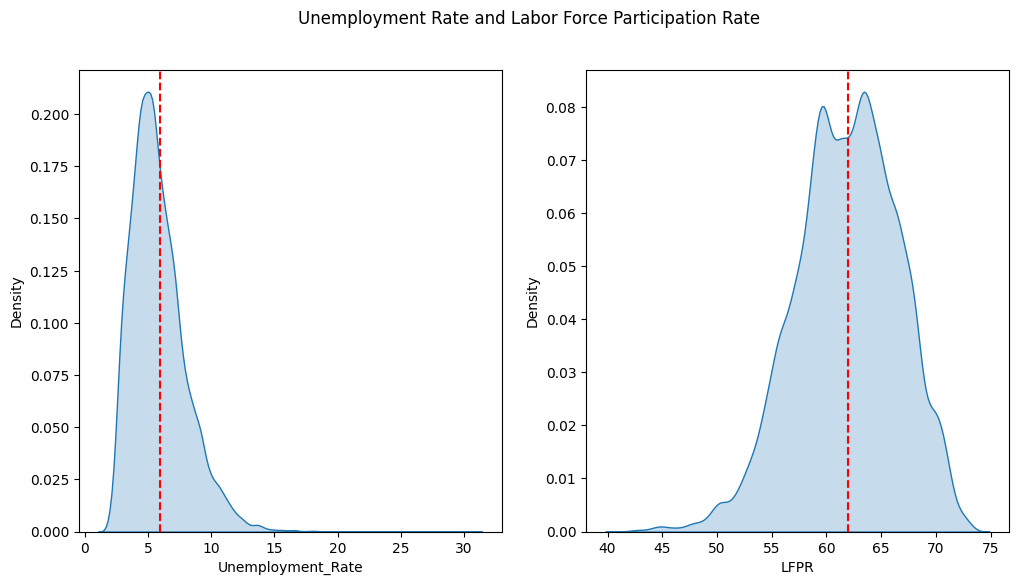

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.kdeplot(df.Unemployment_Rate, label='Unemployment Rate', fill=True, ax=ax[0])
ax[0].axvline(x=df.Unemployment_Rate.mean().round(), color='red', linestyle='--')


sns.kdeplot(df.LFPR, label='Labor Force Participation Rate', fill=True, ax=ax[1])
ax[1].axvline(x=df.LFPR.mean().round(), color='red', linestyle='--')

plt.suptitle('Unemployment Rate and Labor Force Participation Rate')
plt.show()

**To first explore the statistics, we first must determine the standard deviation aswell as the mean for both plots.**

In [94]:
print(f"The mean Unemployment rate is {round(df.Unemployment_Rate.mean(), 2)}, and the standard deviation is {round(df.Unemployment_Rate.std(), 2)}")
print("**********************************************************************************************************************************")
print(f"The mean Labor Force Participation Rate is {round(df.LFPR.mean(), 2)}, and the standard deviation is {round(df.LFPR.std(), 2)}")

The mean Unemployment rate is 5.82, and the standard deviation is 2.18
**********************************************************************************************************************************
The mean Labor Force Participation Rate is 61.85, and the standard deviation is 4.68


In [98]:
#LETS PREDICT THE CHANCES OF AN UNEMPLOYMENT RATE BEING HIGHER THAN 10% and the LFPR BEING LOWER THAN 55%

In [95]:
print(f"The probability of an unemployment in any given state in any given month being higher than 10% is {round(1 - norm.cdf(10, 6, 2), 2)}")
print("**********************************************************************************************************")
print(f"The probability of the LFPR in any given state in any given month being lower than 55% is {round(norm.cdf(55, 68, 10), 2)}")

The probability of an unemployment in any given state in any given month being higher than 10% is 0.02
**********************************************************************************************************
The probability of the LFPR in any given state in any given month being lower than 55% is 0.1


**To finish off the project, lets figure out what percent of unemployment rates and labor force participation rates are below their respective mean values, 6 and 62.**

In [96]:
print(f"{norm.cdf(6, 6, 2)}% of rates are below the mean unemployment rate.")
print("******************************************************")
print(f"{(norm.cdf(62, 68, 10)).round(2)}% of rates are below the mean labor force participation rate.")

0.5% of rates are below the mean unemployment rate.
******************************************************
0.27% of rates are below the mean labor force participation rate.


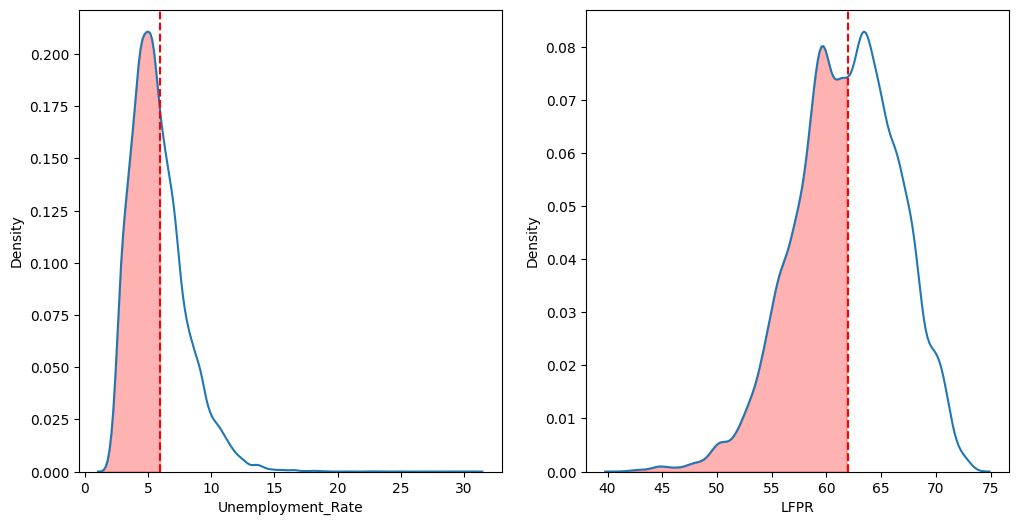

In [97]:
#plot the above
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
kde = sns.kdeplot(df.Unemployment_Rate, label='Unemployment Rate', ax=ax[0])
ax[0].axvline(x=df.Unemployment_Rate.mean().round(), color='red', linestyle='--')
x_values = kde.lines[0].get_xdata()
y_values = kde.lines[0].get_ydata()
ax[0].fill_between(x_values, y_values, where=(x_values < 6), color='red', alpha=0.3)

kde2 = sns.kdeplot(df.LFPR, label='LFPR', ax=ax[1])
ax[1].axvline(x=df.LFPR.mean().round(), color='red', linestyle='--')
x_vals = kde2.lines[0].get_xdata()
y_vals = kde2.lines[0].get_ydata()
ax[1].fill_between(x_vals, y_vals, where=(x_vals < 62), color='red', alpha=0.3)
# Display the plot
plt.show()

**This data project should now give you a better understanding in trends, predictions, and probabilities when it comes to both the unemployment rate, and labor force participation rate in America. Thank you.**